In [4]:
# dependencies

import pandas as pd
import time
import os


In [5]:
# read in the data

vine_df = pd.read_csv('data/vine_table.csv')
vine_df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
0,RTIS3L2M1F5SM,5,0,0,N,Y
1,R1ZV7R40OLHKD,5,0,0,N,Y
2,R3BH071QLH8QMC,1,0,1,N,Y
3,R127K9NTSXA2YH,3,0,0,N,Y
4,R32ZWUXDJPW27Q,4,0,0,N,Y


In [6]:
# Filter the data and create a new DataFrame or table to retrieve all the rows where the total_votes count is equal to or greater than 20 to pick reviews that are more likely to be helpful and to avoid having division by zero errors later on

filtered_vine_df = vine_df[vine_df['total_votes']>20]

In [7]:
# Filter the new DataFrame or table created in Step 1 and create a new DataFrame or table to retrieve all the rows where the number of helpful_votes divided by total_votes is equal to or greater than 50%

helpful_vine_df = filtered_vine_df[filtered_vine_df['helpful_votes']/filtered_vine_df['total_votes']>0.5]

In [8]:
# Filter the DataFrame or table created in Step 2, and create a new DataFrame or table that retrieves all the rows where a review was written as part of the Vine program (paid), vine == 'Y'

vine_y = helpful_vine_df[helpful_vine_df['vine']=='Y']


In [9]:
# Repeat Step 3, but this time retrieve all the rows where the review was not part of the Vine program (unpaid)

vine_n = helpful_vine_df[helpful_vine_df['vine']=='N']


In [10]:
# Determine the total number of reviews, the number of 5-star reviews, and the percentage of 5-star reviews for the two types of review (paid vs unpaid).

vine_y_total = vine_y.shape[0]
vine_n_total = vine_n.shape[0]

vine_y_5star = vine_y[vine_y['star_rating']==5].shape[0]
vine_n_5star = vine_n[vine_n['star_rating']==5].shape[0]

vine_y_5pct = vine_y_5star/vine_y_total
vine_n_5pct = vine_n_5star/vine_n_total

In [15]:
# Showcase exact metrics

results = pd.DataFrame([[vine_y_total, vine_n_total],
                        [vine_y_5star, vine_n_5star],
                        [vine_y_5pct, vine_n_5pct]],
                       columns=["Vine Reviews", "Non-Vine Reviews"], index=['total', '5 stars', '% of 5 stars'])

results


,Vine Reviews,Non-Vine Reviews
total,90.000000,37385.000000
5 stars,44.000000,14626.000000
% of 5 stars,0.488889,0.391226


<AxesSubplot:title={'center':'Vine Reviews'}>

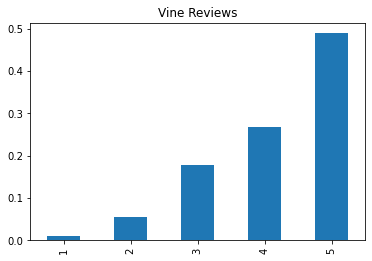

In [16]:
# Represent rate of each review val - Vine Reviews

vine_y_rate = vine_y['star_rating'].value_counts()/vine_y.shape[0]
vine_y_rate.sort_index().plot.bar(title='Vine Reviews')

<AxesSubplot:title={'center':'Non-Vine Reviews'}>

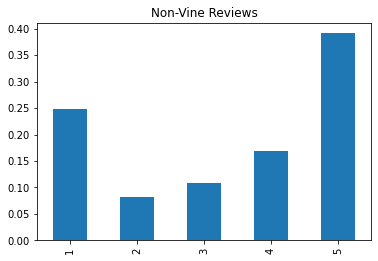

In [17]:
# Represent rate of each review val - non-Vine Reviews

vine_n_rate= vine_n['star_rating'].value_counts()/vine_n.shape[0]
vine_n_rate.sort_index().plot.bar(title='Non-Vine Reviews')